link dataset = https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### **data cleaning**

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

### **encoding**

In [6]:
x = pd.get_dummies(x)
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,1,0,0,0,0,0,0,1,0


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
L = LabelEncoder()
y = L.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### **data split**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### **standarisasi**

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.fit_transform(X_test)

### **modeling**

In [13]:
from keras import Sequential
from keras.layers import Dense

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96146 non-null  float64
 1   hypertension                 96146 non-null  int64  
 2   heart_disease                96146 non-null  int64  
 3   bmi                          96146 non-null  float64
 4   HbA1c_level                  96146 non-null  float64
 5   blood_glucose_level          96146 non-null  int64  
 6   gender_Female                96146 non-null  uint8  
 7   gender_Male                  96146 non-null  uint8  
 8   gender_Other                 96146 non-null  uint8  
 9   smoking_history_No Info      96146 non-null  uint8  
 10  smoking_history_current      96146 non-null  uint8  
 11  smoking_history_ever         96146 non-null  uint8  
 12  smoking_history_former       96146 non-null  uint8  
 13  smoking_history_

In [15]:
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=15))

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

input_dim = 15 karena ada 15 kolom/atribut

output layer menggunakan activation sigmoid dan menggunakan 1 neuron karena target hanya memiliki dua kelas

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2977 (11.63 KB)
Trainable params: 2977 (11.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **training model**

In [17]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

In [18]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

menggunakan binary_crossentropy karena target hanya memiliki dua kelas

In [19]:
from keras.callbacks import EarlyStopping
monitor_callbacks = EarlyStopping(monitor='val_accuracy', patience=10)

In [20]:
model_training = model.fit(
                    x = X_scaled_train,
                    y = y_train,
                    validation_data=(X_scaled_test, y_test),
                    epochs=100,
                    verbose=1,
                    callbacks=[monitor_callbacks]
                )

Epoch 1/100
2104/2104 [==============================] - 17s 5ms/step - loss: 0.1411 - accuracy: 0.9511 - val_loss: 0.1225 - val_accuracy: 0.9556
Epoch 2/100
2104/2104 [==============================] - 11s 5ms/step - loss: 0.1159 - accuracy: 0.9595 - val_loss: 0.1055 - val_accuracy: 0.9626
Epoch 3/100
2104/2104 [==============================] - 10s 5ms/step - loss: 0.1072 - accuracy: 0.9625 - val_loss: 0.0986 - val_accuracy: 0.9647
Epoch 4/100
2104/2104 [==============================] - 11s 5ms/step - loss: 0.0979 - accuracy: 0.9656 - val_loss: 0.0936 - val_accuracy: 0.9683
Epoch 5/100
2104/2104 [==============================] - 11s 5ms/step - loss: 0.0924 - accuracy: 0.9681 - val_loss: 0.0882 - val_accuracy: 0.9696
Epoch 6/100
2104/2104 [==============================] - 11s 5ms/step - loss: 0.0906 - accuracy: 0.9687 - val_loss: 0.0862 - val_accuracy: 0.9706
Epoch 7/100
2104/2104 [==============================] - 11s 5ms/step - loss: 0.0891 - accuracy: 0.9690 - val_loss: 0.0873 -

### **model evaluation**

In [31]:
score = model.evaluate(X_scaled_test, y_test)
print("test loss = ", score[0])
print("test accuracy = ", score[1])

902/902 [==============================] - 4s 4ms/step - loss: 0.0835 - accuracy: 0.9716
test loss =  0.08354289084672928
test accuracy =  0.9715712070465088


### **grafik**

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

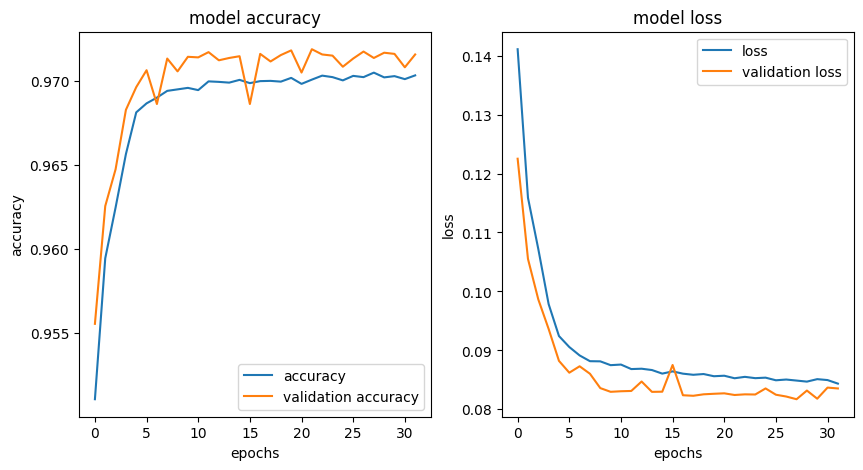

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(model_training.history['accuracy'], label='accuracy')
plt.plot(model_training.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(model_training.history['loss'], label='loss')
plt.plot(model_training.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")